## 7. Time Series Classification Part 1: Feature Creation/Extraction

bending1, bending2, cycling, lying, sitting, standing walking

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from IPython.display import display
from scipy.stats import bootstrap

In [2]:
# def change_sep(path):
#     with open(path, 'r') as f:
#         data = f.readlines()
#     for i in range(5, len(data)):
#         data[i] = data[i].replace(" ", ",")
#         data[i] = data[i][:-2] + "\n"
#     with open(path, 'w') as f:
#         f.writelines(data)
# change_sep("../data/AReM/bending2/dataset4.csv")

#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [3]:
actions = ["bending1", "bending2", "cycling", 
"lying", "sitting", "standing", "walking"]
# Floder names in alphabetical order of first letter 

data_list = [] # store all of data frames
test_index = [] # store test data index
train_index = [] # store training data index
class_list = [] # store classes
binary_class = [] # store bending or not defined by 1, 0
i = 0

for act in actions:
    for f in natsorted(glob.glob(os.path.join("../data/AReM/", act, "*.csv"))):
        names=["time", "avg_rss12", "var_rss12", "avg_rss13",
         "var_rss13", "avg_rss23", "var_rss23"]
        class_list.append(act)

        if act in ["bending1", "bending2"]:
            binary_class.append(1)
        else:
            binary_class.append(0)
            
        data_list.append(pd.read_csv(f, skiprows=range(5), 
        index_col=0, names=names, header=None))

        if act in actions[:2]:
            if(f.split("/")[-1] in [f"dataset{x}.csv" for x in range(1,3)]):
                test_index.append(i)
            else:
                train_index.append(i)

        if act in actions[2:]:
            if(f.split("/")[-1] in [f"dataset{x}.csv" for x in range(1,4)]):
                test_index.append(i)
            else:
                train_index.append(i)
        i += 1

In [4]:
len(train_index) + len(test_index)

88

#### (c) Feature Extraction

##### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

From the [Stackexchage](https://stats.stackexchange.com/questions/50807/features-for-time-series-classification)\
Simple statistical features
1. Means in each of the 𝑑 dimensions
2. Standard deviations of the 𝑑 dimensions
3. Skewness, Kurtosis and Higher order moments of the 𝑑 dimensions
4. Maximum and Minimum values

According to the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html), there are a lot of time domain features.
Here are some functions:
1. absolute_maximum(x)
2. absolute_sum_of_changes(x)
3. count_above_mean(x)
4. count_below_mean(x)
5. maximum(x)
6. mean(x)
7. mean_abs_change(x)
8. median(x)
9. minimum(x)
10. quantile(x, q)
11. skewness(x)
12. variance(x)

##### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [5]:
TDF = [] # store time domain features' results
feature_names = data_list[0].describe().drop(index='count').index.tolist()
for d in data_list:
    TDF.append(d.describe().drop(index='count').to_numpy().flatten('F'))

In [6]:
data_list[0].describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583
std,1.476967,0.322605,4.462952,0.965659,2.188449,0.582915
min,37.250000,0.000000,4.000000,0.000000,27.250000,0.000000
25%,39.250000,0.000000,16.000000,0.000000,33.000000,0.000000
50%,40.500000,0.430000,19.250000,0.500000,35.000000,0.430000
75%,42.000000,0.500000,23.250000,1.120000,36.000000,1.300000
max,45.000000,1.300000,29.500000,7.230000,38.250000,1.920000


In [7]:
columns = []
for i in range(1,7):
    for name in feature_names:
        columns.append(name+str(i))
TDF_df = pd.DataFrame(TDF, columns=columns)
TDF_df

,mean1,std1,min1,25%1,50%1,75%1,max1,mean2,std2,min2,...,50%5,75%5,max5,mean6,std6,min6,25%6,50%6,75%6,max6
0,40.624792,1.476967,37.25,39.25,40.50,42.0000,45.00,0.358604,0.322605,0.0,...,35.00,36.00,38.25,0.570583,0.582915,0.00,0.0000,0.43,1.3000,1.92
1,42.812812,1.435550,38.00,42.00,42.50,43.6700,45.67,0.372438,0.289158,0.0,...,33.00,34.50,38.50,0.571083,0.601010,0.00,0.0000,0.43,1.3000,3.11
2,43.954500,1.558835,35.00,43.00,44.33,45.0000,47.40,0.426250,0.338690,0.0,...,36.00,36.50,38.50,0.493292,0.513506,0.00,0.0000,0.43,0.9400,1.79
3,42.179813,3.670666,33.00,39.15,43.50,45.0000,47.75,0.696042,0.630860,0.0,...,35.00,36.33,38.67,0.613521,0.524317,0.00,0.0000,0.50,1.0000,2.18
4,41.678063,2.243490,33.00,41.33,41.75,42.7500,45.75,0.535979,0.405469,0.0,...,30.00,31.25,37.50,0.383292,0.389164,0.00,0.0000,0.43,0.5000,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,33.586875,4.650935,19.50,30.25,34.25,37.0000,45.33,4.576562,2.461077,0.0,...,16.00,18.25,25.00,3.259729,1.640243,0.00,2.0500,3.11,4.3225,8.32
84,34.322750,4.752477,19.75,31.00,35.25,38.0000,45.50,4.456333,2.599284,0.0,...,15.75,17.75,23.25,3.432562,1.732727,0.00,2.1575,3.20,4.5650,9.67
85,34.546229,4.842294,19.50,31.25,35.25,37.8125,46.00,4.371958,2.360448,0.0,...,15.75,17.75,22.75,3.338125,1.656742,0.00,2.1600,3.08,4.3350,10.00
86,34.873229,4.531720,23.50,31.75,35.25,38.2500,46.25,4.380583,2.435437,0.0,...,16.00,18.00,23.50,3.424646,1.690960,0.00,2.1700,3.27,4.5000,9.51


##### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [8]:
import warnings
warnings.filterwarnings("ignore")

cis = [] # confident intervals
rng = np.random.default_rng()
for col, e in TDF_df.items():
    e = np.array(e)
    try:
        res = bootstrap((e,), np.std, confidence_level=0.9, random_state=rng)
        ci = (res.confidence_interval.low, res.confidence_interval.high)
        print(f"{col} std: {e.std():.2f}; "
        f"bootstrap confidence interval:({ci[0]:.2f}, {ci[1]:.2f})")
        cis.append(ci)
    except:
        print(f"{col}, std: {e.std()}, It's a all 0 sample, so 100% sure std is 0")
        cis.append((0.0, 0.0))

mean1 std: 5.31; bootstrap confidence interval:(4.79, 6.01)
std1 std: 1.76; bootstrap confidence interval:(1.60, 1.99)
min1 std: 9.52; bootstrap confidence interval:(8.54, 11.19)
25%1 std: 6.12; bootstrap confidence interval:(5.65, 6.72)
50%1 std: 5.41; bootstrap confidence interval:(4.90, 6.11)
75%1 std: 5.11; bootstrap confidence interval:(4.44, 5.97)
max1 std: 4.37; bootstrap confidence interval:(3.52, 5.46)
mean2 std: 1.57; bootstrap confidence interval:(1.40, 1.71)
std2 std: 0.88; bootstrap confidence interval:(0.81, 0.94)
min2, std: 0.0, It's a all 0 sample, so 100% sure std is 0
25%2 std: 0.94; bootstrap confidence interval:(0.84, 1.04)
50%2 std: 1.40; bootstrap confidence interval:(1.26, 1.55)
75%2 std: 2.11; bootstrap confidence interval:(1.91, 2.30)
max2 std: 5.03; bootstrap confidence interval:(4.67, 5.45)
mean3 std: 3.99; bootstrap confidence interval:(3.48, 4.55)
std3 std: 0.94; bootstrap confidence interval:(0.80, 1.21)
min3 std: 2.94; bootstrap confidence interval:(2.78,

##### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

My choices are
1. ["mean", "min", "max"]
2. ["25%", "50%", "75%"]
3. ["mean", "std", "max"]

##### v. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 7(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [9]:
def scatterplot_sub(sub_features, series_number, data_df, label_list):
    ''' show scatter plots according to features and series we want

    Parameters
    ----------
    sub_features: 3 time domain features list, e.g. ["mean", "min", "max"]
    series_number: time series numbers list, we have 6 series
    data_df: dataframe of the whole features
    label_list: list of labels of data we want to use

    Returns
    -------
    features_df: specific feature pandas dataframe 
        according to features and series we want
        
    '''
    features = []
    for i in series_number:
        for f in sub_features:
            features.append(f+str(i))
    features_df = data_df[features]
    features_df.insert(len(features_df.columns), 'label', label_list)
    pairplot_fig = sns.pairplot(
        features_df, hue='label', vars=features_df.columns[:-1], corner=True)
    plt.subplots_adjust(top=0.95)
    pairplot_fig.fig.suptitle(f"Scatter plots among {sub_features} of series {series_number}",
                              fontsize=18, alpha=0.95, weight='bold')
    plt.show()

    return features_df

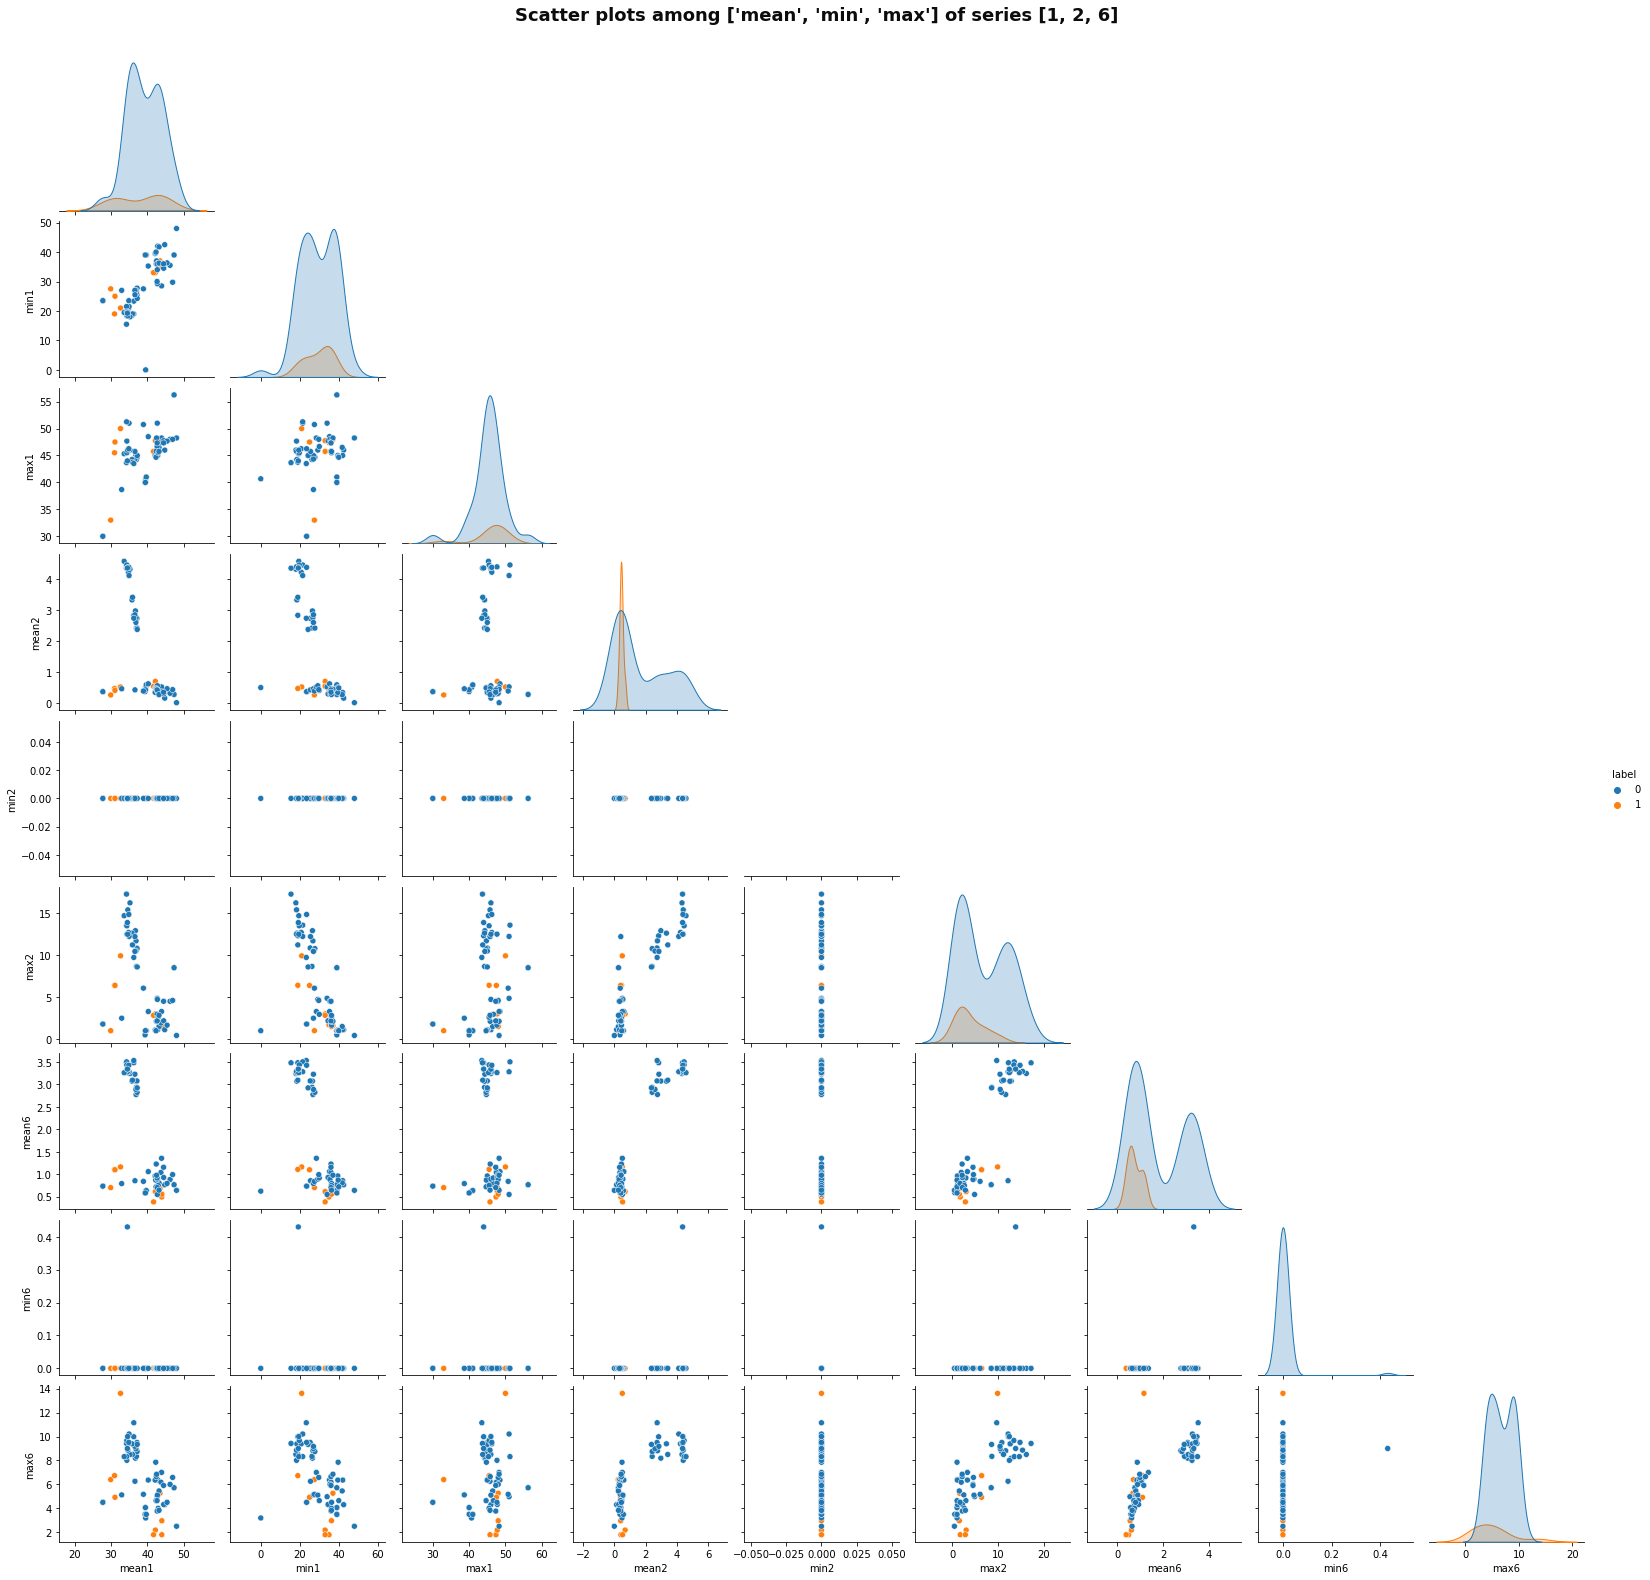

In [11]:
sub_features = ["mean", "min", "max"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f1 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

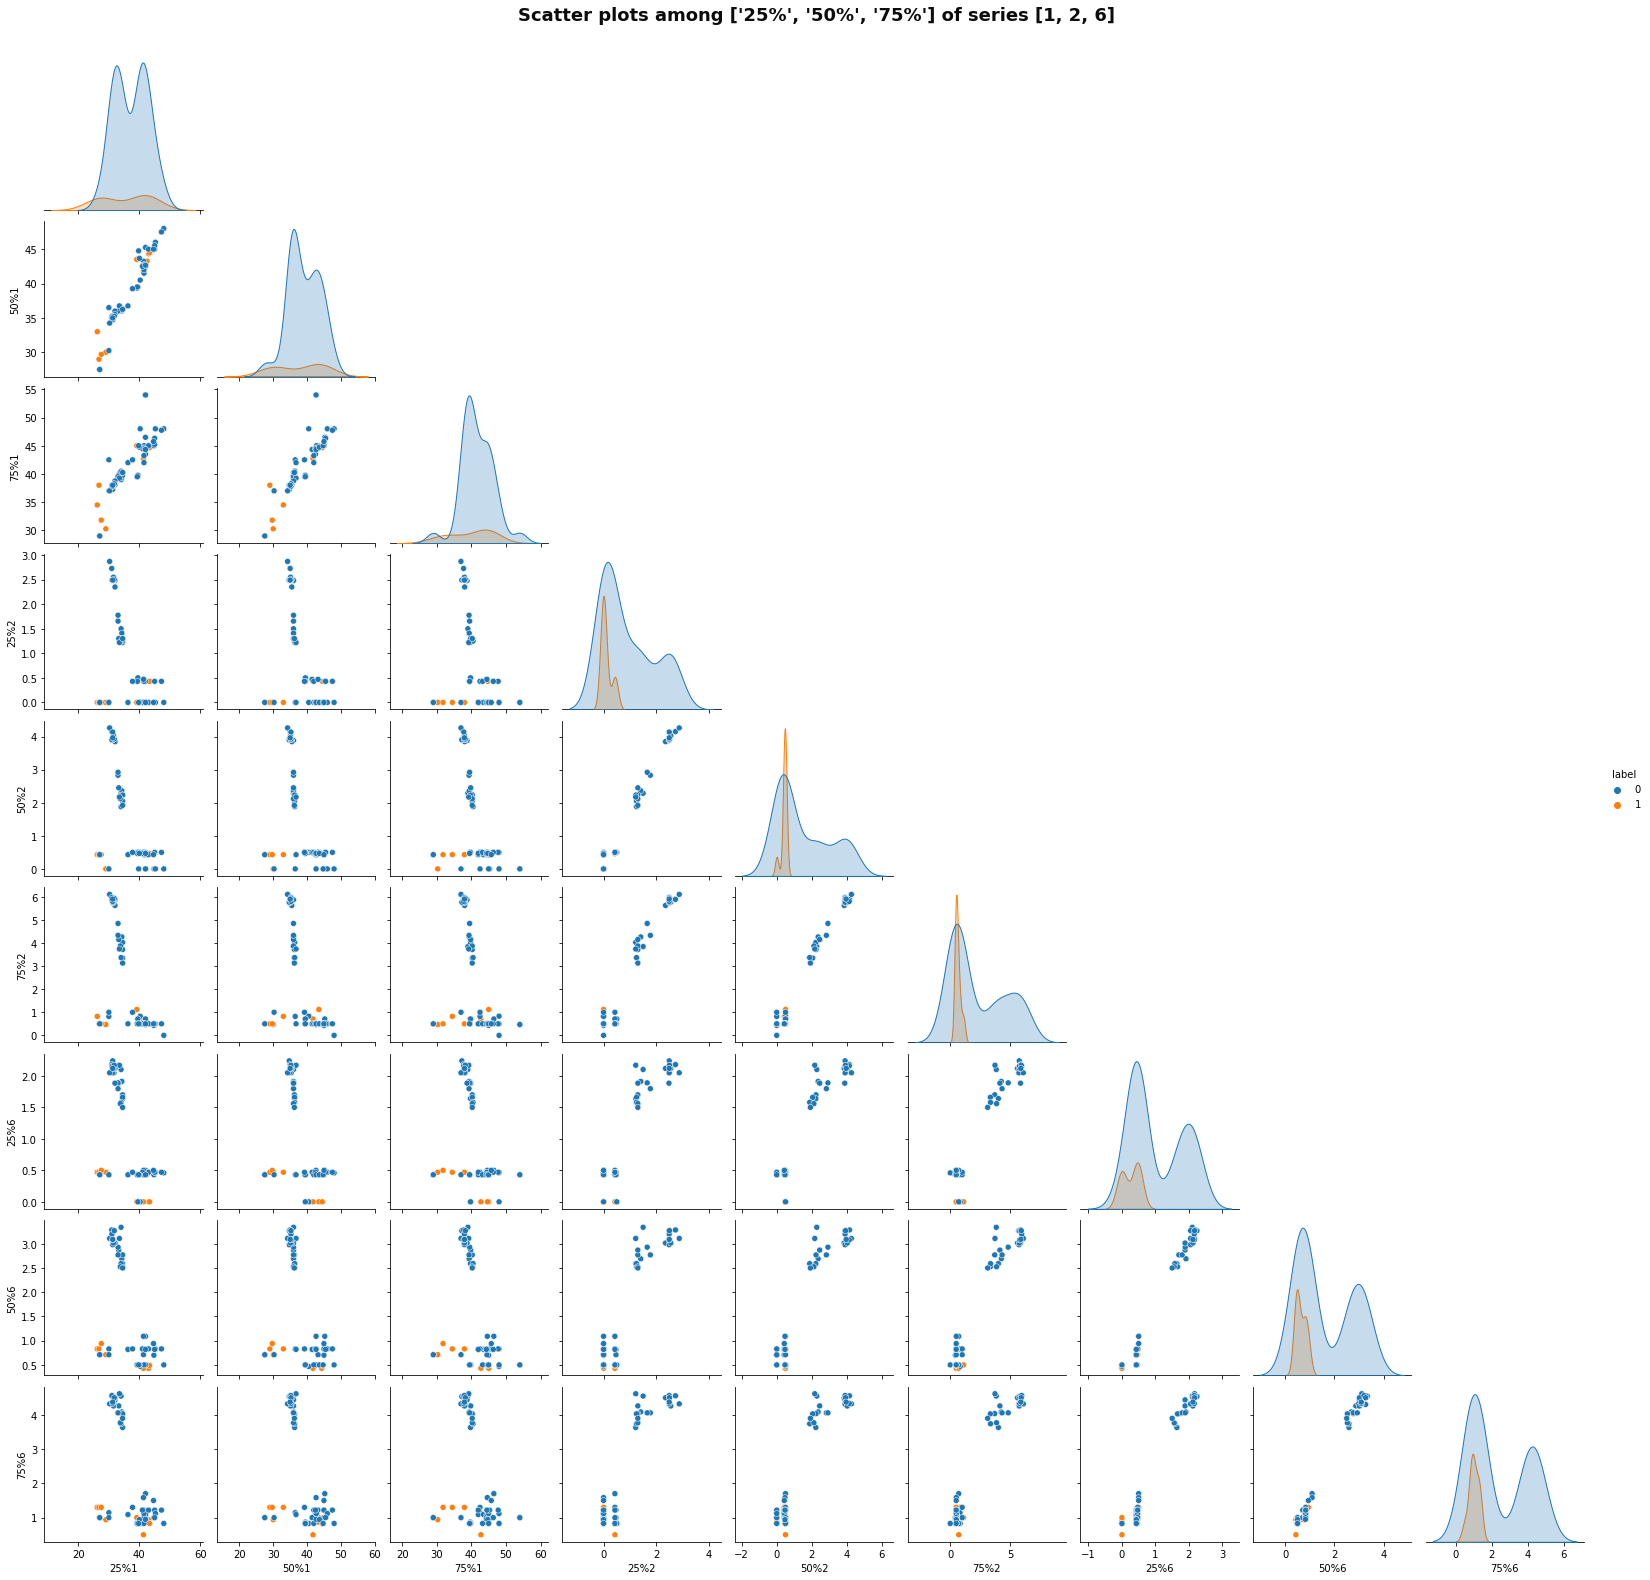

In [12]:
sub_features = ["25%", "50%", "75%"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f2 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

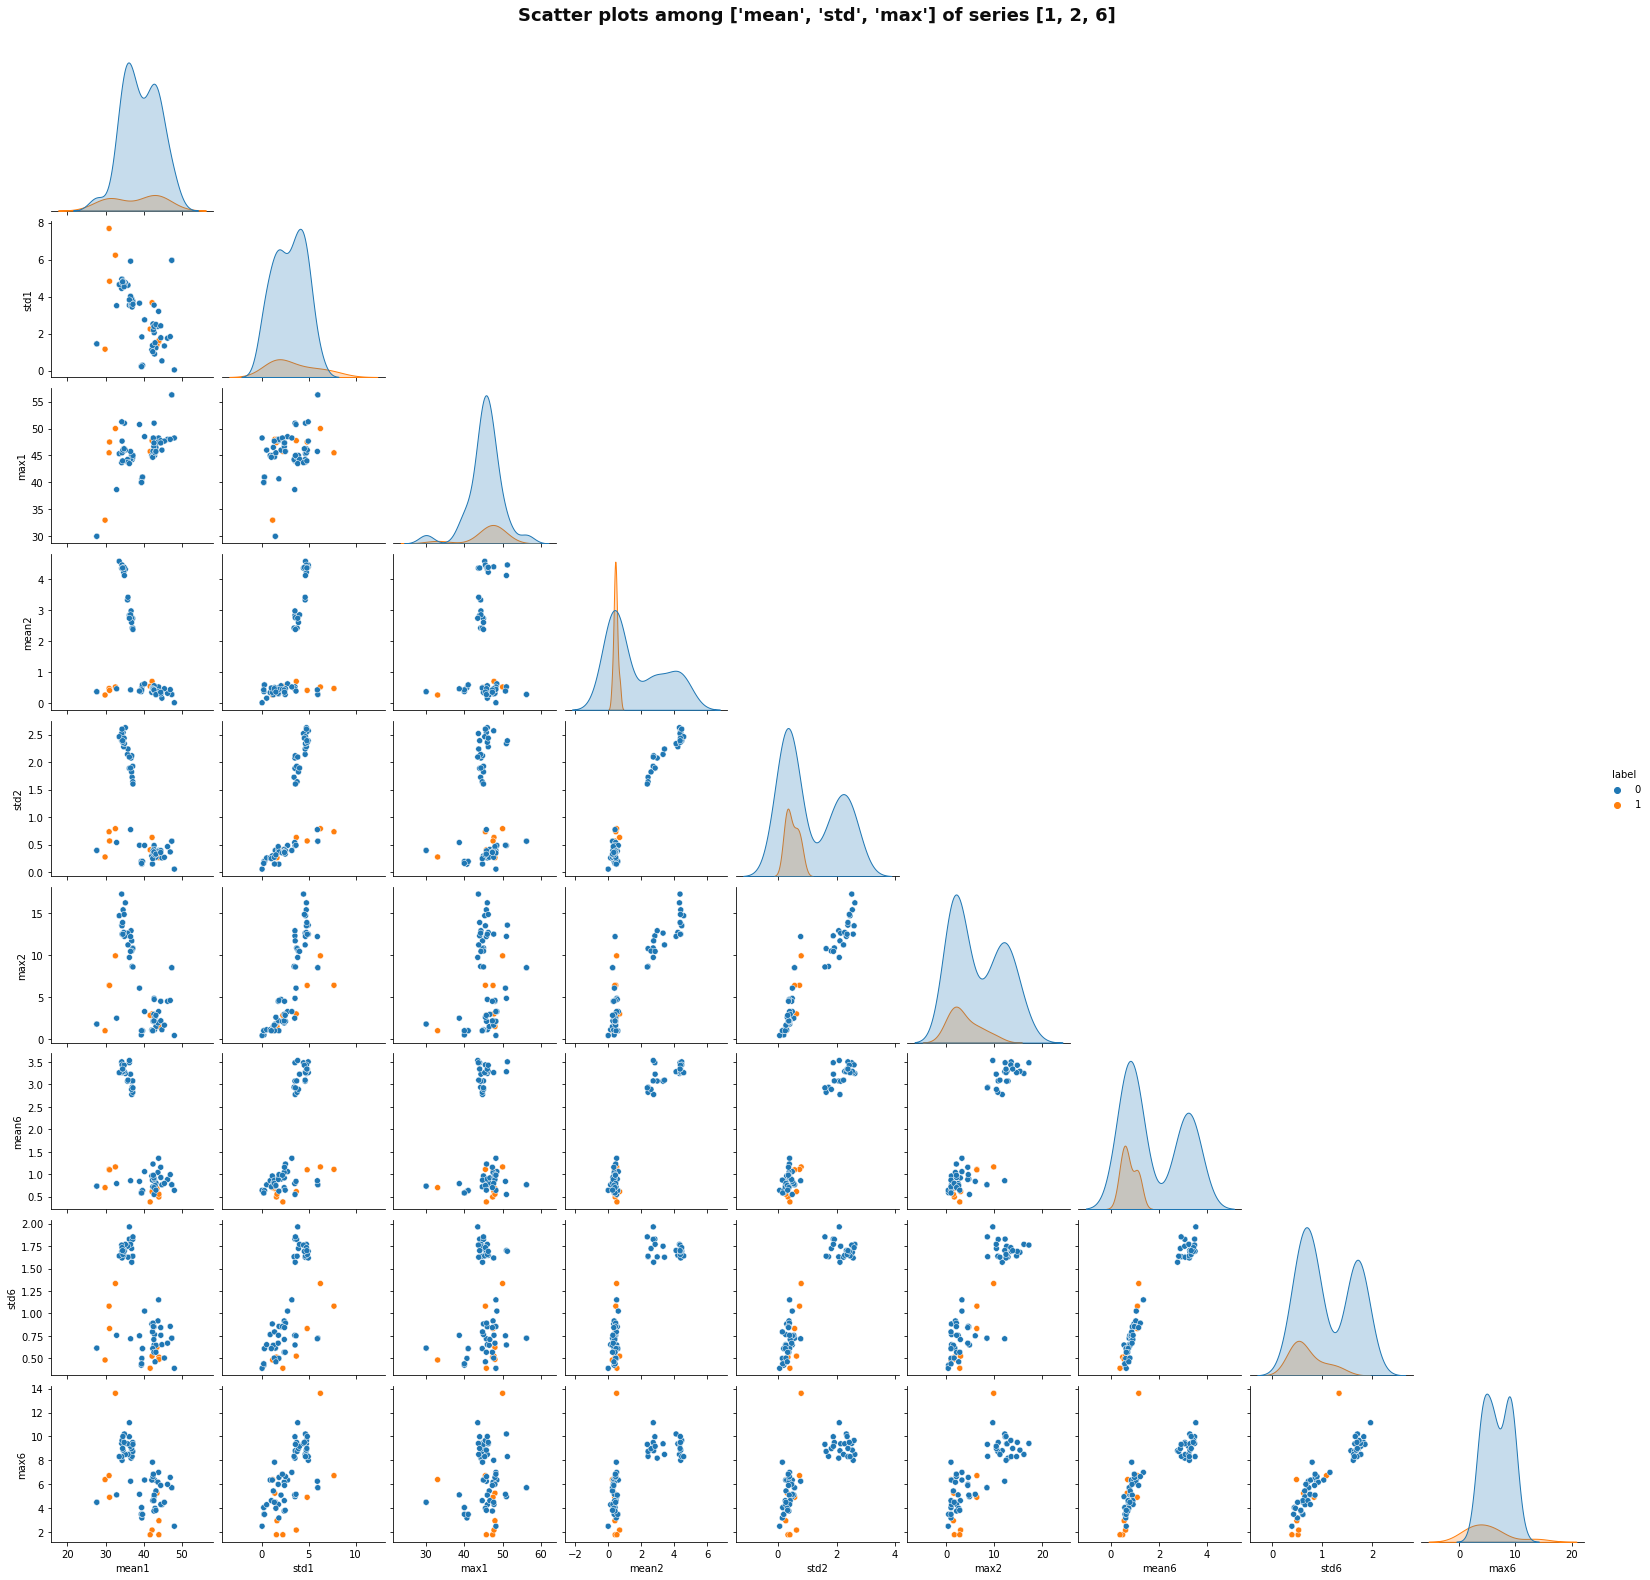

In [13]:
sub_features = ["mean", "std", "max"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f3 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

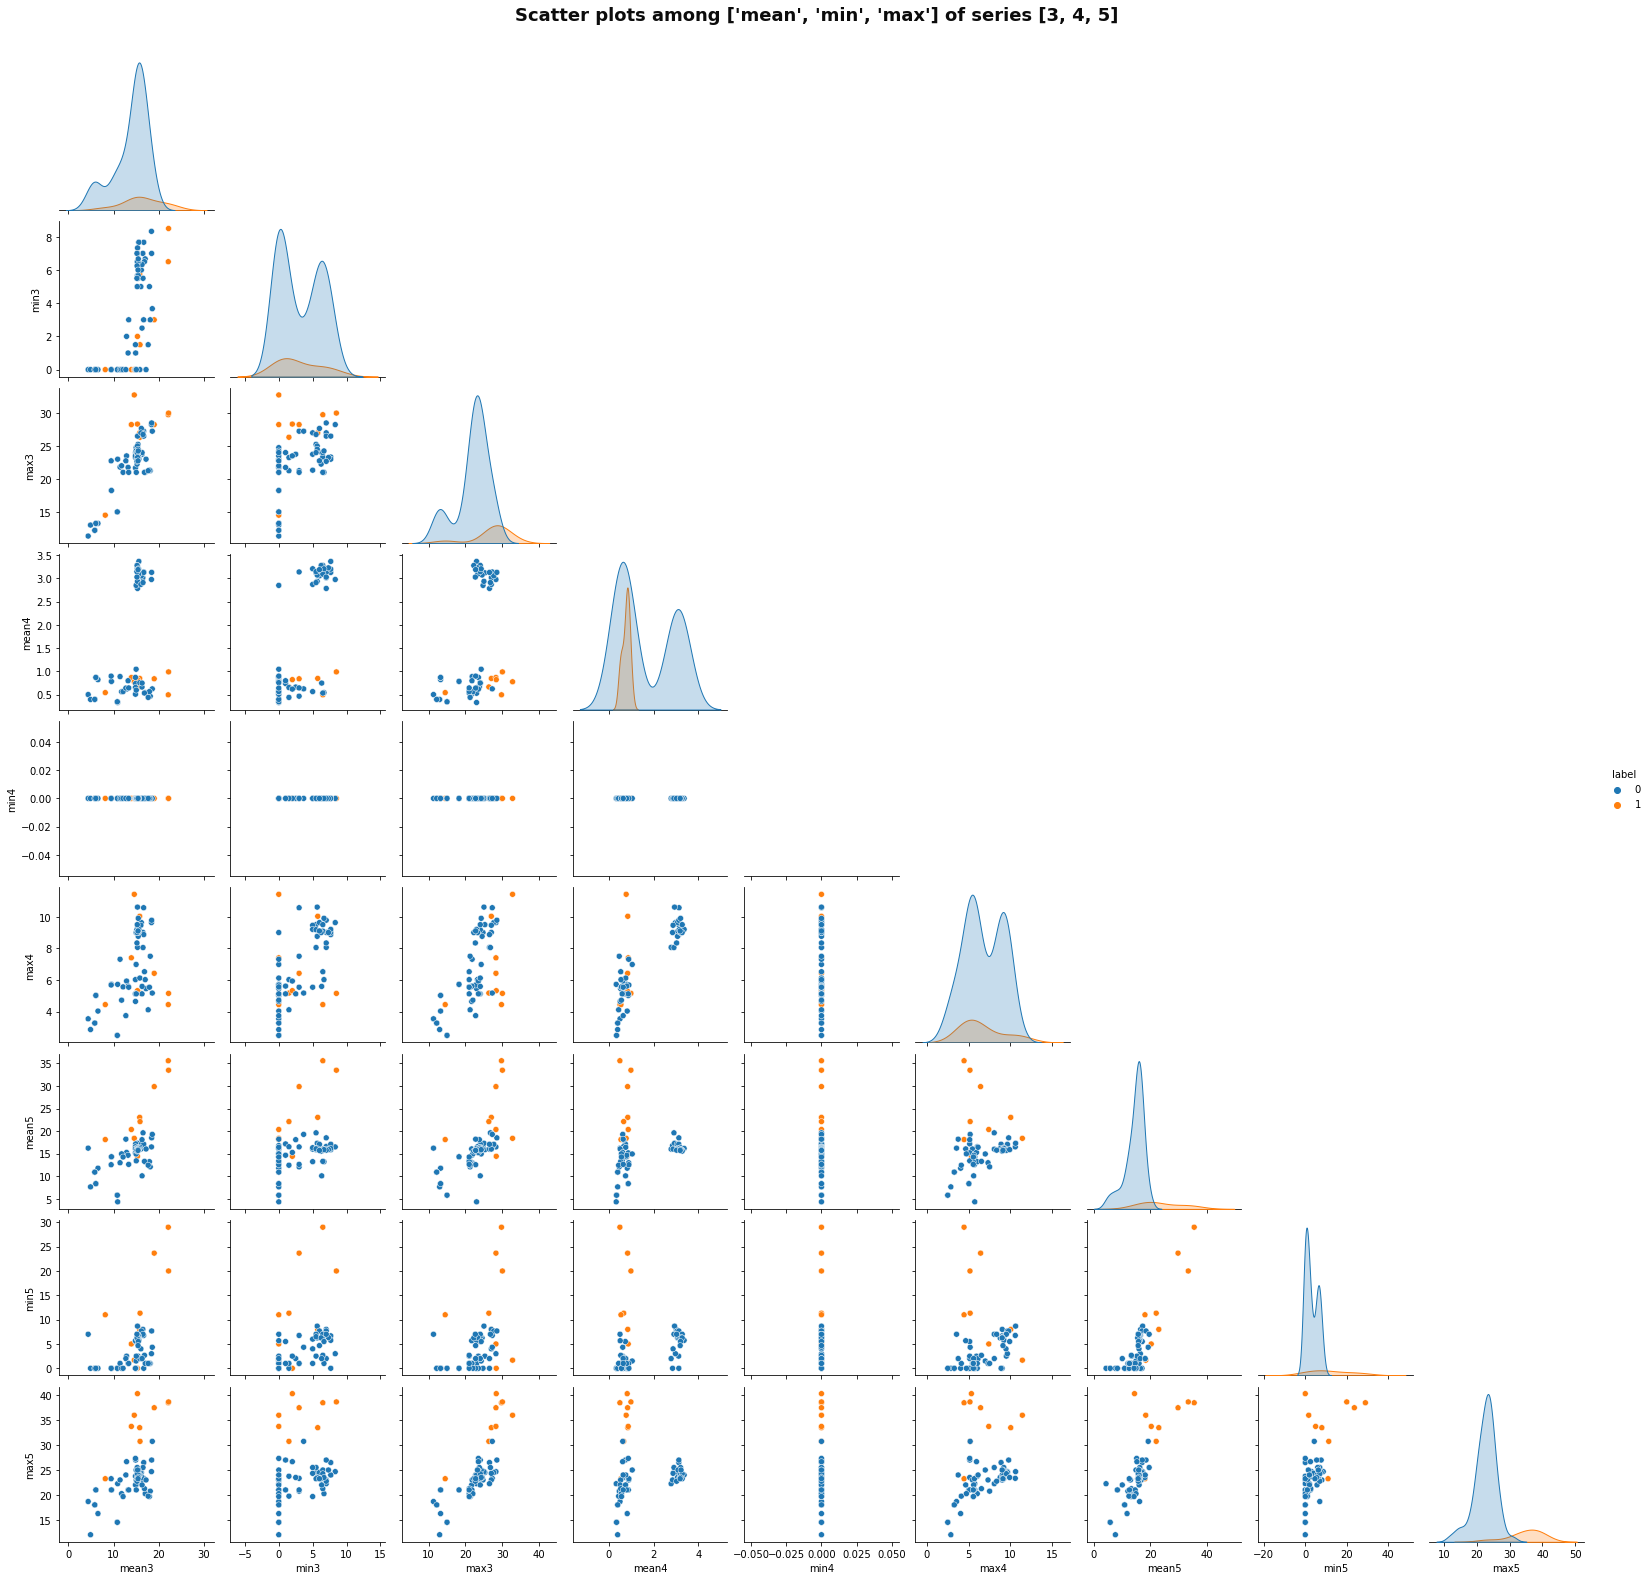

In [15]:
sub_features = ["mean", "min", "max"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f4 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

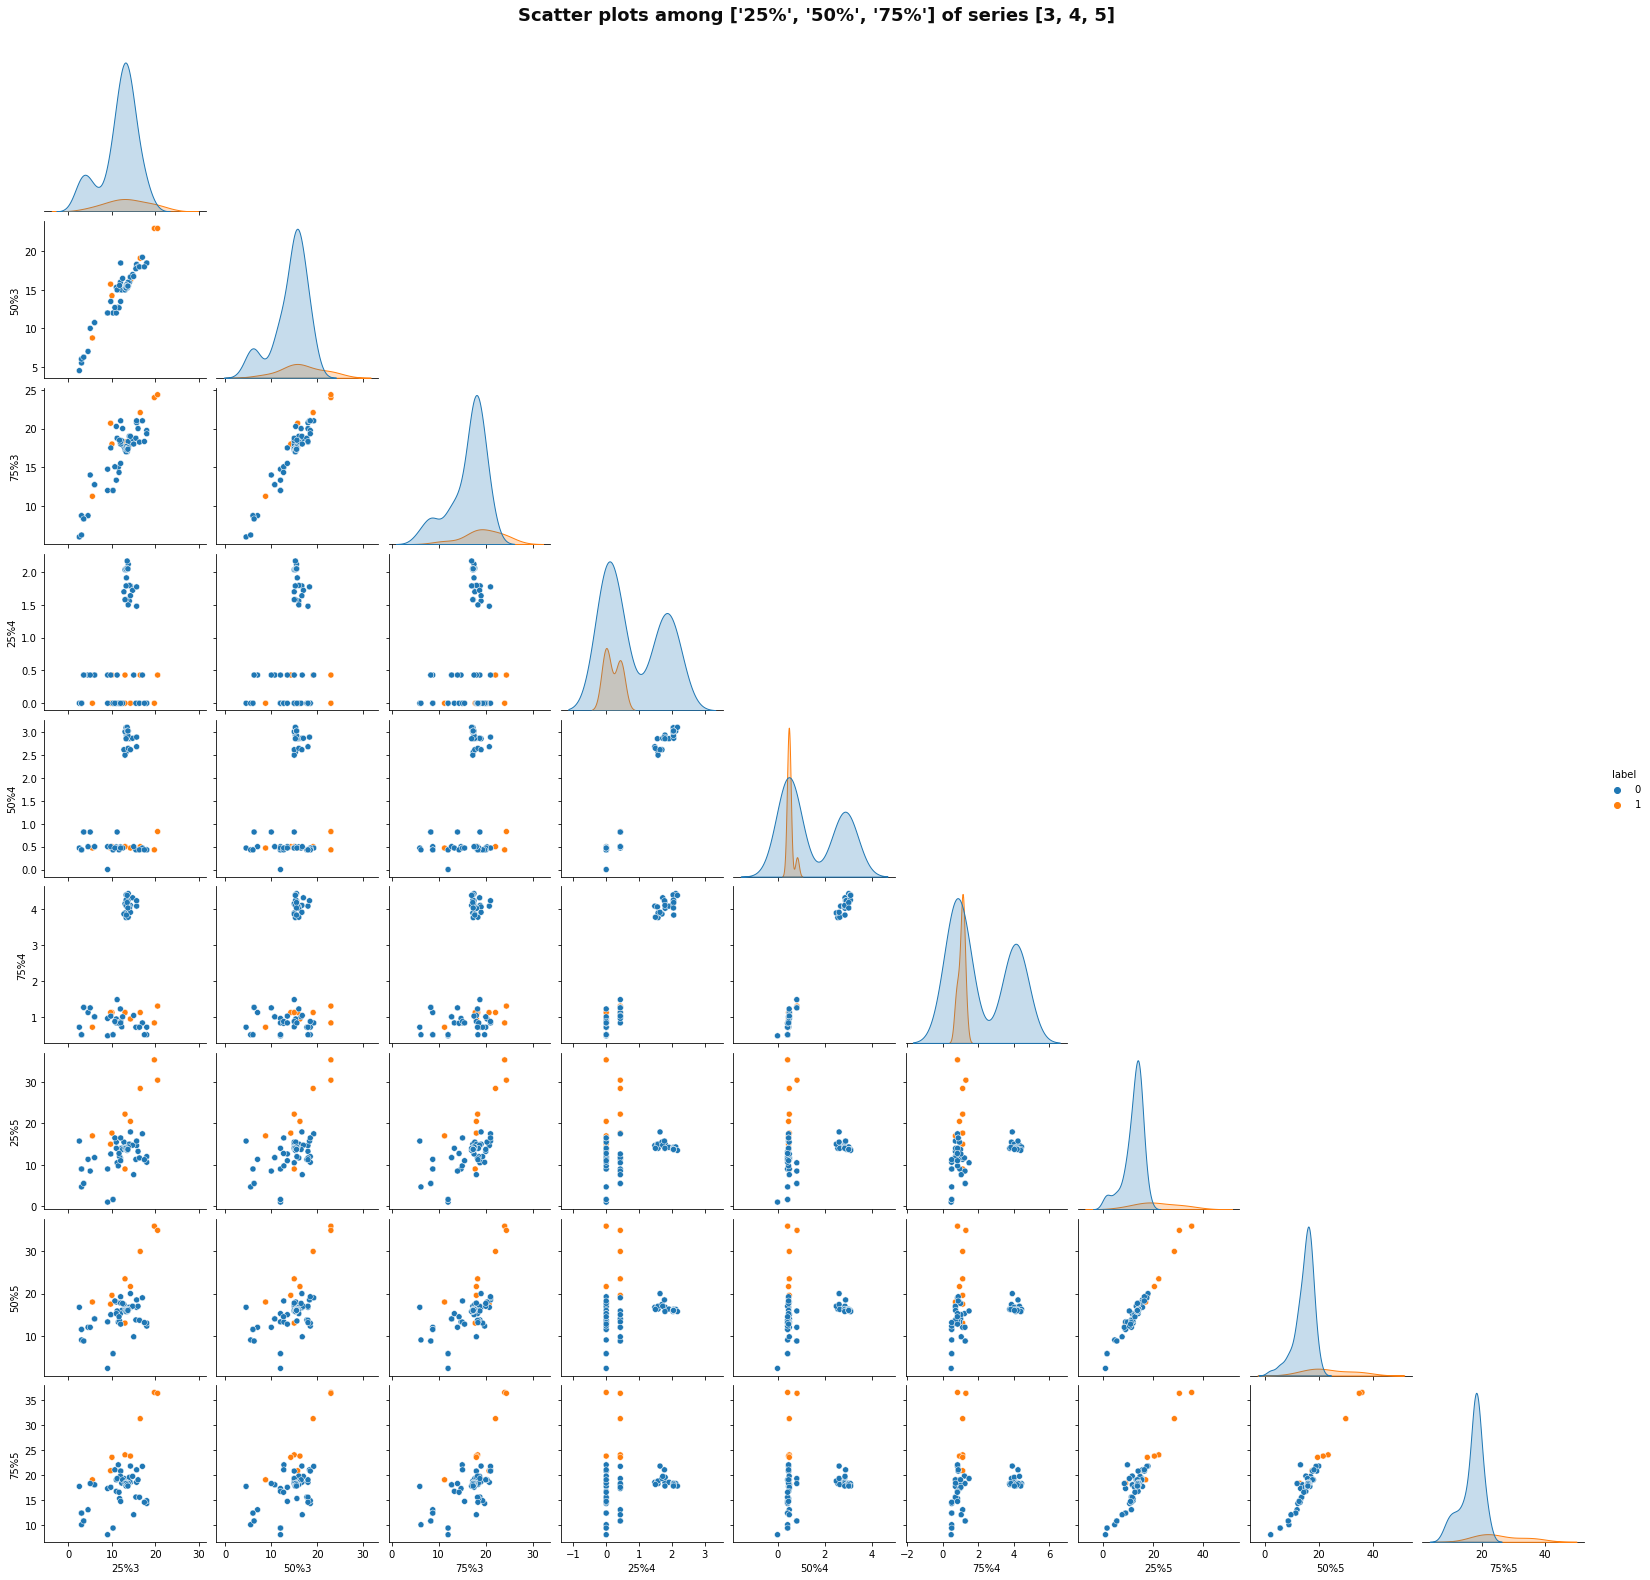

In [16]:
sub_features = ["25%", "50%", "75%"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f5 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

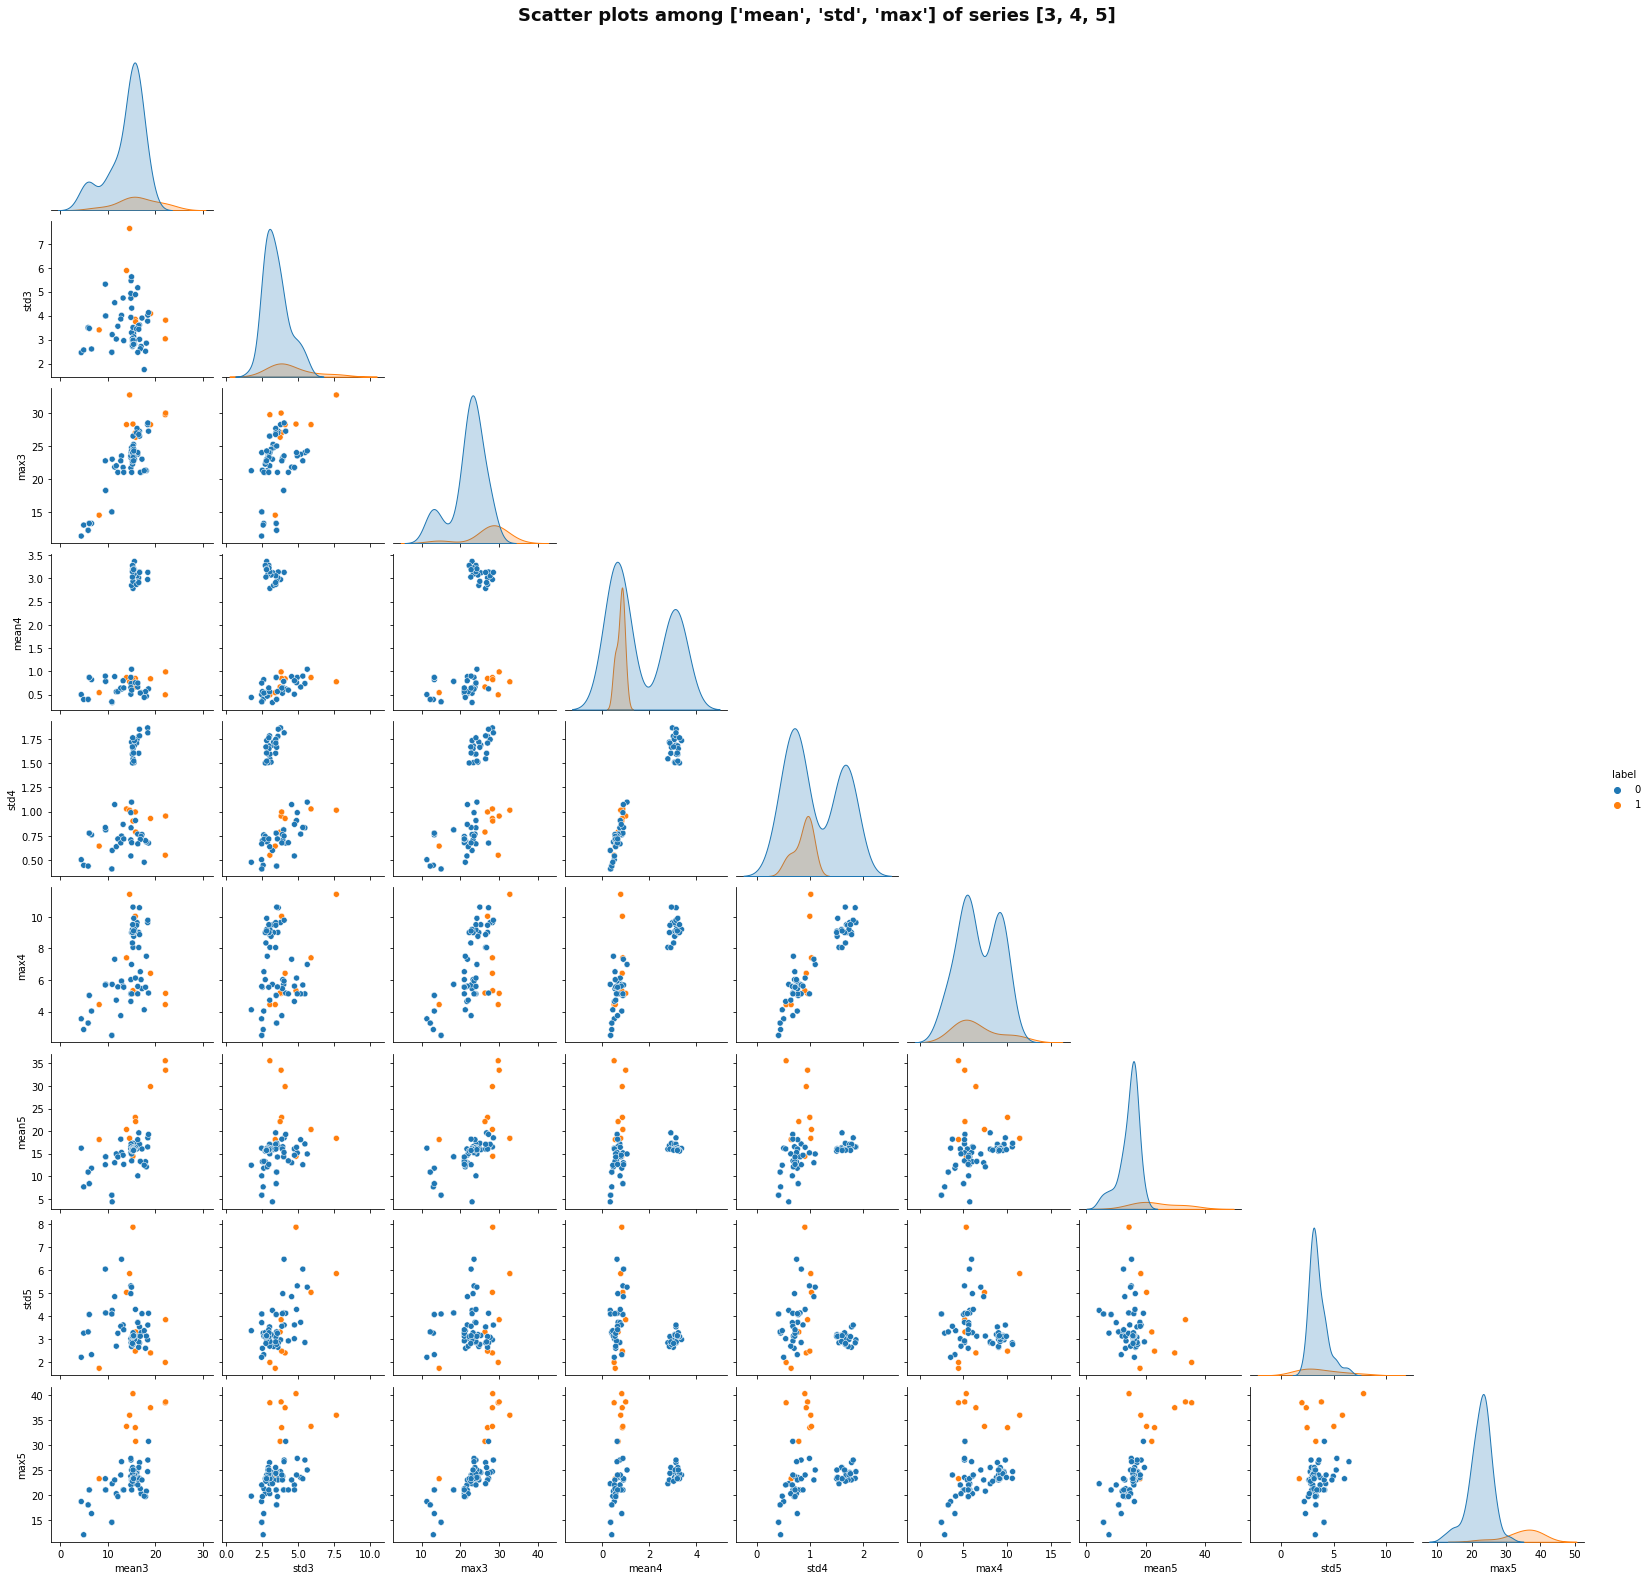

In [17]:
sub_features = ["mean", "std", "max"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f6 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)